# Sensors dataset extraction

Author: Thiago Nascimento (thiago.nascimento@eawag.ch)

This notebook is used to retrieve and concatenate the BAFU dataset into hourly and daily resolutions. The output is one file per catchemnt (similar to the CAMELS_CH), with 5 columns: date, electric_cond(µS/cm), pH(-), temperature(°C) & oxygen_conc(mg/l)

## Requirements
**Python:**

* Python>=3.6
* Jupyter
* geopandas=0.10.2
* numpy
* os
* pandas=2.1.3
* scipy=1.9.0
* tqdm

Check the Github repository for an environment.yml (for conda environments) or requirements.txt (pip) file.

**Files:**

* 


**Directory:**

* Clone the GitHub directory locally
* Place any third-data variables in their respective directory.
* ONLY update the "PATH" variable in the section "Configurations", with their relative path to the EStreams directory. 


## References
* 
## Observations
* 

# Import modules

In [1]:
import pandas as pd
import numpy as np
import tqdm as tqdm
import os
import glob
import warnings


# Configurations

In [2]:
# Only editable variables:
# Relative path to your local directory
PATH = ".."
# Suppress all warnings
warnings.filterwarnings("ignore")

* #### The users should NOT change anything in the code below here. 

In [3]:
# Non-editable variables:
PATH_OUTPUT = r"results\stream_water_chemistry\timeseries"

# Set the directory:
os.chdir(PATH)

In [4]:
os.getcwd()

'c:\\Users\\nascimth\\OneDrive - Eawag\\Eawag\\Papers\\CAMELS_CH_Chem\\GitHub\\CAMELS_CH_chem'

# Import data
* Sensors

In [5]:
# Full dataset
path = r"C:\Users\nascimth\Documents\data\CAMELS_CH_Chem\data\phys_daten_BAFU\phys_daten_BAFU\\"

filenames = glob.glob(path + "*.csv")
len(filenames)

423

#### Hourly data
* Electric conductivity

In [6]:
# Define the two specific words you want to filter for
word1 = 'Elektrische'
word2 = 'Tagesmittel'

# Filter CSV files based on whether their names contain both words
electric_filenames = [file for file in filenames if (word1 in file) and (word2 in file)]
len(electric_filenames)

19

In [7]:
electric_filenames

['C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_daten_BAFU\\2009_Elektrische LeitfÔÇ×higkeit_Tagesmittel_1976-01-01_2022-12-31.csv',
 'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_daten_BAFU\\2016_Elektrische LeitfÔÇ×higkeit_Tagesmittel_1976-01-01_2022-12-31.csv',
 'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_daten_BAFU\\2018_Elektrische LeitfÔÇ×higkeit_Tagesmittel_1976-01-01_2022-12-31.csv',
 'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_daten_BAFU\\2044_Elektrische LeitfÔÇ×higkeit_Tagesmittel_1986-02-27_2022-12-31.csv',
 'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_daten_BAFU\\2068_Elektrische LeitfÔÇ×higkeit_Tagesmittel_1978-01-01_2022-12-31.csv',
 'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_daten_BAFU\\2085_Elektrische LeitfÔÇ×higkeit_Tagesmittel_1976-01-01_202

* BAFU: 2290 is located elsewhere (2290_St-Sulpice_Areuse_Eawag_CAMELS_CH)
* NADUF: 2046, 2044 and 2045 (not BAFU).

* pH

In [8]:
# Define the two specific words you want to filter for
word1 = 'pH'
word2 = 'Tagesmittel'

# Filter CSV files based on whether their names contain both words
ph_filenames = [file for file in filenames if (word1 in file) and (word2 in file)]
ph_filenames

['C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_daten_BAFU\\2009_pH-Wert_Tagesmittel_1976-01-01_2022-12-31.csv',
 'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_daten_BAFU\\2016_pH-Wert_Tagesmittel_1976-01-01_2022-12-31.csv',
 'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_daten_BAFU\\2018_pH-Wert_Tagesmittel_1976-01-01_2022-12-31.csv',
 'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_daten_BAFU\\2044_pH-Wert_Tagesmittel_1986-01-29_2022-12-31.csv',
 'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_daten_BAFU\\2068_pH-Wert_Tagesmittel_1978-01-01_2022-12-31.csv',
 'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_daten_BAFU\\2085_pH-Wert_Tagesmittel_1976-01-01_2022-12-31.csv',
 'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_daten_BAFU\\2091_pH-We

Here we have only 2622 (2243). 

* Temperature

In [9]:
# Define the two specific words you want to filter for
word1 = 'Wassertemperatur'
word2 = 'Tagesmittel'

# Filter CSV files based on whether their names contain both words
temperature_filenames = [file for file in filenames if (word1 in file) and (word2 in file)]
temperature_filenames

['C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_daten_BAFU\\2009_Wassertemperatur_Tagesmittel_1974-01-01_2022-12-31.csv',
 'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_daten_BAFU\\2011_Wassertemperatur_Tagesmittel_1974-01-01_2022-12-31.csv',
 'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_daten_BAFU\\2016_Wassertemperatur_Tagesmittel_1974-01-01_2022-12-31.csv',
 'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_daten_BAFU\\2018_Wassertemperatur_Tagesmittel_1974-01-01_2022-12-31.csv',
 'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_daten_BAFU\\2019_Wassertemperatur_Tagesmittel_1974-01-01_2022-12-31.csv',
 'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_daten_BAFU\\2029_Wassertemperatur_Tagesmittel_1974-01-01_2022-12-31.csv',
 'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Ch

* BAFU: 2290 is located elsewhere (2290_St-Sulpice_Areuse_Eawag_CAMELS_CH), 2176 (Kanton ZH) is located elsewhere.

* NADUF: 2046, 2044, 2045 (not BAFU).

* 2622 (2243) is included in both files here for temperature, but suposelly is the same (ask Ursi again). 

* 2424 and 2425 are included here, but not in CAMELS or in the original list from Ursi (87 files in Hydronetz), but are in the excel and files. 

* This give us a total of 89 stations with temperature. If we take out 2425 and 2425 we have the 87. 

* Oxygen

In [10]:
# Define the two specific words you want to filter for
word1 = 'Sauerstoff'
word2 = 'Tagesmittel'

# Filter CSV files based on whether their names contain both words
oxygen_filenames = [file for file in filenames if (word1 in file) and (word2 in file)]
oxygen_filenames

['C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_daten_BAFU\\2009_Sauerstoff_Tagesmittel_1976-01-01_2022-12-31.csv',
 'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_daten_BAFU\\2016_Sauerstoff_Tagesmittel_1976-01-01_2022-12-31.csv',
 'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_daten_BAFU\\2018_Sauerstoff_Tagesmittel_1976-01-01_2022-12-31.csv',
 'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_daten_BAFU\\2044_Sauerstoff_Tagesmittel_1986-01-29_2022-12-31.csv',
 'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_daten_BAFU\\2068_Sauerstoff_Tagesmittel_1978-01-01_2022-12-31.csv',
 'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_daten_BAFU\\2085_Sauerstoff_Tagesmittel_1976-01-01_2022-12-31.csv',
 'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_date

Here we have only 2622 (2243). 

### Aggregation

* We have 89 stations in total.
* The 87 from the temperature list + 2290 + 2176.
* We first aggregate the data available from BAFU, then the 2 extra stations.

#### - BAFU

In [12]:
network_filename

,Zeitstempel,Wert
0,1974-01-01 00:00:00,3.50
1,1974-01-02 00:00:00,3.70
2,1974-01-03 00:00:00,3.80
3,1974-01-04 00:00:00,3.80
4,1974-01-05 00:00:00,3.90
...,...,...
17892,2022-12-27 00:00:00,6.52
17893,2022-12-28 00:00:00,5.68
17894,2022-12-29 00:00:00,5.30
17895,2022-12-30 00:00:00,5.99


In [37]:
columns_names = ["temp_sensor", "pH_sensor", "ec_sensor", "O2C_sensor"]

for filename in tqdm.tqdm(temperature_filenames):
    daily_timeseries = pd.DataFrame(index = pd.date_range('01-01-1981','12-31-2020', freq='D'), columns=columns_names)


    network_filename = pd.read_csv(filename, skiprows=8, delimiter = ";", encoding='latin-1', usecols=["Zeitstempel", 
                                                                                                      "Wert"])
    network_filename["date"] = pd.to_datetime(network_filename["Zeitstempel"], format='%Y-%m-%d %H:%M:%S')
    network_filename = network_filename[["date", "Wert"]]
    network_filename.set_index("date", inplace = True)
    
    namestation = os.path.basename(filename)
    namestation = namestation.split("_", 5)[0]
    daily_timeseries["temp_sensor"] = network_filename["Wert"]
    
    
    ###################################################
    ##  pH
    
    filenames = ph_filenames.copy()
    # List to store filenames containing the number
    matching_filenames = []

    # Iterate over filenames and check if the number is present in the first 4 characters of the file name
    for filename in filenames:
        # Extract the file name (without the path)
        file_name_only = filename.split("\\")[-1]
        # Extract the first 4 characters of the file name
        first_four_characters = file_name_only[:4]
        # Check if the number is present in the first 4 characters
        if namestation in first_four_characters:
            matching_filenames.append(filename)
    try:        
        network_filename = pd.read_csv(matching_filenames[0], skiprows=8, delimiter = ";", encoding='latin-1', usecols=["Zeitstempel", 
                                                                                                          "Wert"])
        network_filename["date"] = pd.to_datetime(network_filename["Zeitstempel"], format='%Y-%m-%d %H:%M:%S')
        network_filename = network_filename[["date", "Wert"]]
        network_filename.set_index("date", inplace = True)
        network_filename['Wert'] = pd.to_numeric(network_filename['Wert'], errors='coerce')

        daily_timeseries["pH_sensor"] = network_filename["Wert"]      
    except: 
        1+1
        
    ###################################################
    ##  electric_cond(µS/cm)
    
    filenames = electric_filenames.copy()
    # List to store filenames containing the number
    matching_filenames = []

    # Iterate over filenames and check if the number is present in the first 4 characters of the file name
    for filename in filenames:
        # Extract the file name (without the path)
        file_name_only = filename.split("\\")[-1]
        # Extract the first 4 characters of the file name
        first_four_characters = file_name_only[:4]
        # Check if the number is present in the first 4 characters
        if namestation in first_four_characters:
            matching_filenames.append(filename)
    try:       
        network_filename = pd.read_csv(matching_filenames[0], skiprows=8, delimiter = ";", encoding='latin-1', usecols=["Zeitstempel", 
                                                                                                          "Wert"])
        network_filename["date"] = pd.to_datetime(network_filename["Zeitstempel"], format='%Y-%m-%d %H:%M:%S')
        network_filename = network_filename[["date", "Wert"]]
        network_filename.set_index("date", inplace = True)
        network_filename['Wert'] = pd.to_numeric(network_filename['Wert'], errors='coerce')

        daily_timeseries["ec_sensor"] = network_filename["Wert"]
    except:
        1+1
    ###################################################
    ##  oxygen_conc(mg/l)
    
    filenames = oxygen_filenames.copy()
    # List to store filenames containing the number
    matching_filenames = []

    # Iterate over filenames and check if the number is present in the first 4 characters of the file name
    for filename in filenames:
        # Extract the file name (without the path)
        file_name_only = filename.split("\\")[-1]
        # Extract the first 4 characters of the file name
        first_four_characters = file_name_only[:4]
        # Check if the number is present in the first 4 characters
        if namestation in first_four_characters:
            matching_filenames.append(filename)
    try:      
        network_filename = pd.read_csv(matching_filenames[0], skiprows=8, delimiter = ";", encoding='latin-1', usecols=["Zeitstempel", 
                                                                                                          "Wert"])
        network_filename["date"] = pd.to_datetime(network_filename["Zeitstempel"], format='%Y-%m-%d %H:%M:%S')
        network_filename = network_filename[["date", "Wert"]]
        network_filename.set_index("date", inplace = True)
        network_filename['Wert'] = pd.to_numeric(network_filename['Wert'], errors='coerce')

        daily_timeseries["O2C_sensor"] = network_filename["Wert"]  
    except: 
        1+1
    
    daily_timeseries.index.name = "date"
    daily_timeseries = daily_timeseries.apply(pd.to_numeric, errors='coerce')

    daily_timeseries = daily_timeseries.round(2)

    daily_timeseries = daily_timeseries.loc["1981":"2020"]
    
    daily_timeseries.to_csv(PATH_OUTPUT + "\\daily\CAMELS_CH_Chem_daily_"+namestation+".csv", encoding='latin')

100%|██████████| 87/87 [00:20<00:00,  4.26it/s]


#### - 2 extra stations
Station 2176

In [38]:
namestation = "2176"

columns_names = ["temperature(°C)", "pH(-)", "electric_cond(µS/cm)", "oxygen_conc(mg/l)"]
hourly_timeseries = pd.DataFrame(index = pd.date_range('01-01-1981','12-31-2020', freq='H'), columns=columns_names)

path_2176 = r'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\Kanton ZH\S2176\S2176_Wassertemperatur _Stundenmittel.txt'
network_2176 = pd.read_csv(path_2176, skiprows=2, delimiter = "\t", encoding='latin-1')
network_2176["date"] = network_2176["Datum"] + " "  + network_2176["Zeit"]
network_2176["date"] = pd.to_datetime(network_2176["date"], format='%d.%m.%Y %H:%M:%S')
network_2176.set_index("date", inplace = True)
network_2176 = network_2176[["Messwert"]]
hourly_timeseries["temperature(°C)"] = network_2176["Messwert"]

hourly_timeseries.index.name = "date"

# Resample to daily data
daily_timeseries = hourly_timeseries.resample('D').mean()

# As it only has nans, we fill it otherwise it would not be exported
daily_timeseries[["pH(-)", "electric_cond(µS/cm)", "oxygen_conc(mg/l)"]] = np.nan

daily_timeseries = daily_timeseries.apply(pd.to_numeric, errors='coerce')

daily_timeseries = daily_timeseries.round(2)

# Rename the names of the columns
daily_timeseries.columns = ["temp_sensor", "pH_sensor", "ec_sensor", "O2C_sensor"]
daily_timeseries = daily_timeseries.loc["1981":"2020"]

daily_timeseries.to_csv(PATH_OUTPUT + "\\daily\CAMELS_CH_Chem_daily_"+namestation+".csv", encoding='latin')
daily_timeseries

,temp_sensor,pH_sensor,ec_sensor,O2C_sensor
date,,,,
1981-01-01,NaN,NaN,NaN,NaN
1981-01-02,NaN,NaN,NaN,NaN
1981-01-03,NaN,NaN,NaN,NaN
1981-01-04,NaN,NaN,NaN,NaN
1981-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-12-27,1.65,NaN,NaN,NaN
2020-12-28,2.40,NaN,NaN,NaN
2020-12-29,2.40,NaN,NaN,NaN


Station 2290

In [39]:
namestation = "2290"

columns_names = ["temperature(°C)", "pH(-)", "electric_cond(µS/cm)", "oxygen_conc(mg/l)"]
hourly_timeseries = pd.DataFrame(index = pd.date_range('01-01-1981','12-31-2020', freq='H'), columns=columns_names)

############ Electrical conductivity
path_2290_EC = 'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\S2290\S2290_St-Sulpice-Areuse_LF_20090425-20221231.CSV'

network_2290_EC = pd.read_csv(path_2290_EC, skiprows=13, delimiter = ";", encoding='latin-1')

network_2290_EC = network_2290_EC[["Datum.1", "Uhrzeit.1", "LF Stundenmittel [µS/cm]"]]

# Drop rows with NaN values in the specific column
network_2290_EC.dropna(subset=['Datum.1'], inplace=True)

network_2290_EC["date"] = network_2290_EC["Datum.1"] + " "  + network_2290_EC["Uhrzeit.1"]
network_2290_EC["date"] = pd.to_datetime(network_2290_EC["date"], format='%d.%m.%Y %H:%M:%S')
network_2290_EC.set_index("date", inplace = True)

############ Temperature
path_2290_T = r'C:\Users\nascimth\Documents\data\CAMELS_CH_Chem\data\S2290\S2290_St-Sulpice-Areuse_T_20090425-20221231.CSV'

network_2290_T = pd.read_csv(path_2290_T, skiprows=13, delimiter = ";", encoding='latin-1')

network_2290_T = network_2290_T[["Datum.1", "Uhrzeit.1", "T Stundenmittel [°C]"]]

# Drop rows with NaN values in the specific column
network_2290_T.dropna(subset=['Datum.1'], inplace=True)

network_2290_T["date"] = network_2290_T["Datum.1"] + " "  + network_2290_T["Uhrzeit.1"]
network_2290_T["date"] = pd.to_datetime(network_2290_T["date"], format='%d.%m.%Y %H:%M:%S')
network_2290_T.set_index("date", inplace = True)

############################################################################
network_2290_EC = network_2290_EC[["LF Stundenmittel [µS/cm]"]]
hourly_timeseries["electric_cond(µS/cm)"] = network_2290_EC["LF Stundenmittel [µS/cm]"]

network_2290_T = network_2290_T[["T Stundenmittel [°C]"]]
hourly_timeseries["temperature(°C)"] = network_2290_T["T Stundenmittel [°C]"]

hourly_timeseries.index.name = "date"

# There are some non-numeric things in the columns, instead of NaNs
hourly_timeseries = hourly_timeseries.apply(pd.to_numeric, errors='coerce')

# Resample to daily data
daily_timeseries = hourly_timeseries.resample('D').mean()

daily_timeseries = daily_timeseries.apply(pd.to_numeric, errors='coerce')

daily_timeseries = daily_timeseries.round(2)

# Rename the names of the columns
daily_timeseries.columns = ["temp_sensor", "pH_sensor", "ec_sensor", "O2C_sensor"]
daily_timeseries = daily_timeseries.loc["1981":"2020"]

daily_timeseries.to_csv(PATH_OUTPUT + "\\daily\CAMELS_CH_Chem_daily_"+namestation+".csv", encoding='latin')

daily_timeseries

,temp_sensor,pH_sensor,ec_sensor,O2C_sensor
date,,,,
1981-01-01,NaN,NaN,NaN,NaN
1981-01-02,NaN,NaN,NaN,NaN
1981-01-03,NaN,NaN,NaN,NaN
1981-01-04,NaN,NaN,NaN,NaN
1981-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-12-27,7.20,NaN,393.66,NaN
2020-12-28,7.26,NaN,396.01,NaN
2020-12-29,7.25,NaN,405.37,NaN


- Remarks

    - 87 stations from BAFU in inverntarlist 

    - 2190, 2424 and 2425 are included here, but not in the internarlist (they are in observation as if they are from other stations) (moved to another folder)

    - 2403, Tages but not Stunden.

    - 2243 (repetition? of 2622) (moved to another folder)
    
    - We need to merge 2622 into 2243.

In [40]:
# Merging 2622 into 2243
bafu_2622_daily = pd.read_csv(r"results\\stream_water_chemistry\\timeseries\daily\2424_2343_2622\CAMELS_CH_chem_daily_2622.csv", encoding='latin')
bafu_2622_daily.set_index("date", inplace=True)
bafu_2622_daily

,temp_sensor,pH_sensor,ec_sensor,O2C_sensor
date,,,,
1981-01-01,4.4,7.70,303.8,9.35
1981-01-02,4.4,7.71,308.5,9.37
1981-01-03,4.5,7.70,336.3,9.24
1981-01-04,4.9,7.74,329.8,9.62
1981-01-05,4.1,7.80,302.1,10.34
...,...,...,...,...
2020-12-27,NaN,NaN,NaN,NaN
2020-12-28,NaN,NaN,NaN,NaN
2020-12-29,NaN,NaN,NaN,NaN


In [41]:
# Merging 2622 into 2243
bafu_2243_daily = pd.read_csv(r"results\\stream_water_chemistry\\timeseries\daily/CAMELS_CH_chem_daily_2243.csv", encoding='latin')
bafu_2243_daily.set_index("date", inplace=True)
bafu_2243_daily

,temp_sensor,pH_sensor,ec_sensor,O2C_sensor
date,,,,
1981-01-01,4.40,NaN,NaN,NaN
1981-01-02,4.40,NaN,NaN,NaN
1981-01-03,4.50,NaN,NaN,NaN
1981-01-04,4.90,NaN,NaN,NaN
1981-01-05,4.10,NaN,NaN,NaN
...,...,...,...,...
2020-12-27,6.42,NaN,NaN,NaN
2020-12-28,6.53,NaN,NaN,NaN
2020-12-29,6.47,NaN,NaN,NaN


<Axes: xlabel='date'>

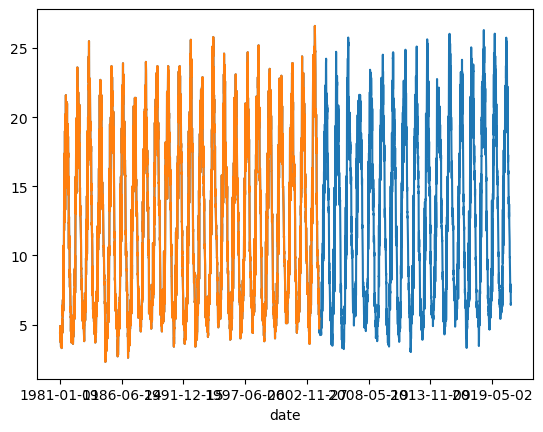

In [42]:
bafu_2243_daily["temp_sensor"].plot()
bafu_2622_daily["temp_sensor"].plot()

In [ ]:
bafu_2243_daily["temp_sensor"].plot()
bafu_2622_daily["temp_sensor"].plot()

In [41]:
bafu_2243_daily["ph"][bafu_2243_daily.ph<=2] = np.nan

<AxesSubplot:xlabel='date'>

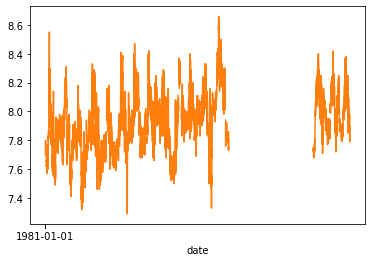

In [56]:
bafu_2243_daily["pH_sensor"].plot()
bafu_2622_daily["pH_sensor"].plot()

<AxesSubplot:xlabel='date'>

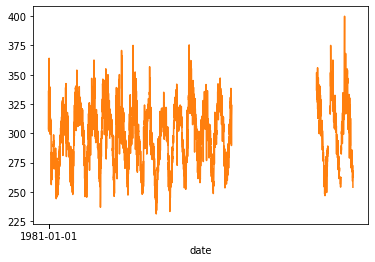

In [58]:
bafu_2243_daily["ec_sensor"].plot()
bafu_2622_daily["ec_sensor"].plot()

<AxesSubplot:xlabel='date'>

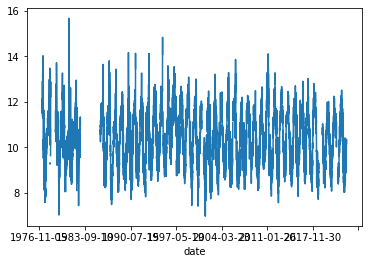

In [29]:
bafu_2243_daily["o"].plot()
#bafu_2622_daily["o"].plot()

2243 is merged with data from 2622:

In [43]:
bafu_2243_daily["ec_sensor"] = bafu_2622_daily["ec_sensor"]

bafu_2243_daily["pH_sensor"] = bafu_2622_daily["pH_sensor"]
bafu_2243_daily["O2C_sensor"] = bafu_2622_daily["O2C_sensor"]


<Axes: xlabel='date'>

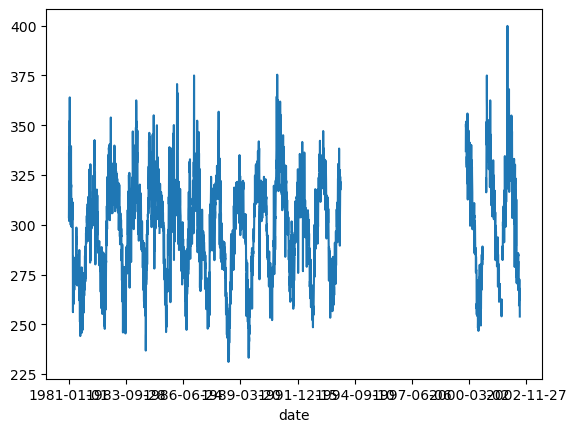

In [44]:
bafu_2243_daily["ec_sensor"].plot()
#bafu_2622_daily["ec_sensor"].plot()

In [45]:
bafu_2243_daily.to_csv(r"results\\stream_water_chemistry\\timeseries\daily/CAMELS_CH_chem_daily_2243.csv", encoding='latin')

# End